In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Regression analysis is the most widely used method of prediction. Linear regression is used when the dataset has a linear correlation and as the name suggests, simple linear regression has one independent variable (predictor) and one dependent variable(response).

The simple linear regression equation is represented as y = a+bx where x is the explanatory variable, y is the dependent variable, b is coefficient and a is the intercept.

For regression analysis, first we have to import libraries.

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

After importing libraries, the dataset is to be imported. 

In [ ]:
#Importing dataset
dataset = pd.read_csv('../input/salary-data-simple-linear-regression/Salary_Data.csv')

To see the first five rows of the dataset we can use dataset.head().

In [ ]:
#To see first 5 rows of the dataset
dataset.head()

Information of dataset like column names, no: of non-null count and null count if any, and the data type can be checked by using dataset.info().

In [ ]:
# To see information of dataset
dataset.info()

Statistical analysis of the dataset like no: of observation, mean, standard deviation and interquartile value can be done using the dataset. describe().

In [ ]:
#Statistical Analysis
dataset.describe()

The relationship between variables can be seen by using sns.pairplot(). For multiple linear regression, it will be very useful, as it shows each feature's relationship with the response.

In [ ]:
#Relationship of dataset
sns.pairplot(dataset)

Assigning dependent variable to y and independent variable to X.

In [ ]:
#Assiging values in X & Y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
print(y)

The dataset has to be split into a training set and a test set analysis. This can be done by the function train_test_split function from the Model_selection module of the Scikit-learn library.


In [ ]:
#Splitting testdata into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

Now the data set will be divided into X_train,X_test,y_train,y_test based on the test_size we have provided as input.

Here dataset has 30 observations and test_size is taken as 33% of the total observation. This indicates the test set should have 33% * 30 =9.9 ~10 observations and the training set should have 20 observations. Random_state is assigned to some value so that the dataset is split randomly.

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print (y_test)

random_state is provided as input to divide the test set and the training set randomly. If we use random_state as 47, then the dataset will be divided in a different random way.

To perform linear regression, LinearRegression class is imported from the module linear_model of the Scikit-learn library. The simple regression model built will be an instance of class LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
#Prediciting Y from Linear regression Model
y_pred = lr.predict(X_test)

Traning data is visualized with X_train and y_train, the red mark indicates the data point and the blue line indicates the regression line or best fit line.

In [ ]:
#Ploting Graph
plt.scatter(X_train,y_train,color='red',marker='X')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title('Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The test set is visualized with the black mark which and here we can datapoint are close to the regression line. The regression model is trained with training set data and has to validate the model with the test set.

In [ ]:
plt.scatter(X_test,y_test,color='black',marker='X')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title('Test Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
         

To find the linear regression equation, coefficient and intercept are to be calculated which can be done with the below equation.

In [ ]:
#Assigning Coefficient (slope) to b
b = lr.coef_

In [ ]:
print("Coefficient  :" , b)

In [ ]:
#Assigning Y-intercept to a
a = lr.intercept_

In [ ]:
print("Intercept : ", a)

For this model, the linear regression equation will be:

Predicted Salary=9426.03876907×(years of experience)+25324.33537924433

For Years of Experience 11, predicted salary can be calculated as:

9426.03876907×(11)+25324.33537924433 = 129010.76183907

y(11) can be predicted with the model as below.


In [ ]:
# y_pred=9426.03876907×(years of experience)+25324.33537924433
#y_predict(11)
print(lr.predict([[11]]))

Mean Squared Error (MSE) is one of the regression evaluation metrics. It is calculated as the average squared difference between the predicted values and the real value. The mathematical equation for MSE is as:
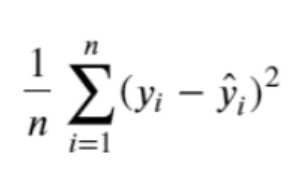

MSE can be calculated from the metrics module of Scikit-learn library.

In [ ]:
#Mean Squared Error (MSE)
from sklearn import metrics

In [ ]:
print('Mean Squared Error (MSE)  : ', metrics.mean_squared_error(y_test, y_pred))

In [ ]:
import statsmodels.api as sm

Ordinary Least-Squares (OLS) estimator module can be called from statsmodels.api to get regression summary.

In [ ]:
X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

R-Square or Adj-R-Square value can be obtained as below.

In [ ]:
print("Adjusted R-Square : ",regsummary.rsquared_adj)
print("R-Square : ",regsummary.rsquared)

If only interested to find the R-Square value, r2_score can be imported from the metrics module of the Scikit-learn library.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, lr.predict(X_train))